In [65]:
import pandas as pd
import numpy as np
import math,copy,os
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from pathlib import Path
from Measure import measure_final_score
import statistics
from CatEncoder import *
import glob
import pickle

In [66]:

def get_results(path_name):
    path = r'/Users/germainherbay/PycharmProjects/Blind/adult/score/change_label/0_5/'+path_name+'/' # use your path
    all_files = glob.glob(path + "/*.csv")
    first_df = pd.read_csv(all_files[0])
    first_df['name'] = Path(all_files[0]).name
    first_df['operator'] = path_name
    for filename in all_files[1:]:
        df = pd.read_csv(filename)
        df['name'] = Path(filename).name
        df['operator'] = path_name
        first_df = first_df.append(df)
    first_df['model'] = first_df['model'].replace(['LogisticRegression()','RandomForestClassifier()', 'SVC()', 'MLPClassifier()'],['LR','RF','SVC', 'MLPC'])
    first_df.rename(columns = {'protected_att':'PA'}, inplace = True)
    return first_df

operators = ['age', 'capital-gain', 'capital-loss', 'education-num',
             'hours-per-week', 'marital-status', 'native-country', 'occupation',
             'race', 'relationship', 'sex', 'workclass']
def get_results_model(operators, model, PA):
    df_1 = get_results(operators[0])
    df_1 = df_1[(df_1["model"] == model) & (df_1["PA"] == PA)]
    for operator in operators[1:]:
        df = get_results(operator)
        df = df[(df["model"] == model) & (df["PA"] == PA)]
        df_1 = df_1.append(df)
    return df_1

def get_all_results(operators, PA):
    df_1 = get_results(operators[0])
    df_1 = df_1[df_1["PA"] == PA]
    for operator in operators[1:]:
        df = get_results(operator)
        df = df[df["PA"] == PA]
        df_1 = df_1.append(df)
    return df_1

In [67]:
df = get_all_results(operators, 'sex')

df_prices = df.groupby("operator").agg([np.mean, np.std])
print(df_prices)


                recall           accuracy           precision            \
                  mean       std     mean       std      mean       std   
operator                                                                  
age             0.5535  0.058784   0.8340  0.008826    0.7175  0.022913   
capital-gain    0.5415  0.063185   0.8325  0.008507    0.7135  0.024767   
capital-loss    0.5445  0.057535   0.8385  0.011821    0.7400  0.023396   
education-num   0.5530  0.072118   0.8330  0.008645    0.7150  0.024170   
hours-per-week  0.5555  0.055675   0.8345  0.008870    0.7190  0.024039   
marital-status  0.5630  0.062163   0.8335  0.008751    0.7130  0.026178   
native-country  0.5625  0.059725   0.8340  0.008826    0.7170  0.023418   
occupation      0.5610  0.059727   0.8350  0.008885    0.7185  0.023458   
race            0.5640  0.060385   0.8360  0.009947    0.7180  0.022618   
relationship    0.5585  0.060548   0.8340  0.008826    0.7135  0.024767   
sex             0.5610  0

In [68]:
df = get_all_results(operators, 'race')

df_prices = df.groupby("operator").agg([np.mean, np.std])
print(df_prices)

                recall           accuracy           precision            \
                  mean       std     mean       std      mean       std   
operator                                                                  
age             0.5585  0.063018   0.8340  0.008826    0.7165  0.025189   
capital-gain    0.5475  0.067268   0.8330  0.008645    0.7110  0.024688   
capital-loss    0.5510  0.062399   0.8385  0.011821    0.7365  0.025189   
education-num   0.5560  0.074721   0.8355  0.010990    0.7150  0.023283   
hours-per-week  0.5630  0.061908   0.8340  0.008826    0.7155  0.023946   
marital-status  0.5635  0.061582   0.8350  0.009459    0.7150  0.023731   
native-country  0.5620  0.061439   0.8365  0.010400    0.7185  0.024121   
occupation      0.5595  0.059778   0.8345  0.009445    0.7190  0.024688   
race            0.5600  0.058490   0.8345  0.009445    0.7170  0.023418   
relationship    0.5540  0.055668   0.8345  0.009445    0.7160  0.025423   
sex             0.5640  0

[Text(0, 0, 'LR'), Text(1, 0, 'RF'), Text(2, 0, 'SVC'), Text(3, 0, 'MLPC')]

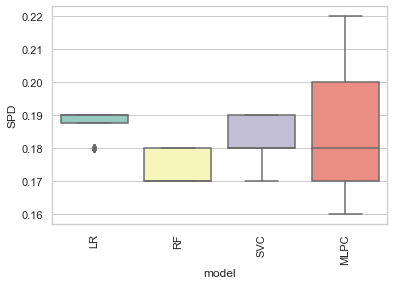

In [69]:
df = get_all_results(operators, 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="model", y="SPD", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

[Text(0, 0, 'LR'), Text(1, 0, 'RF'), Text(2, 0, 'SVC'), Text(3, 0, 'MLPC')]

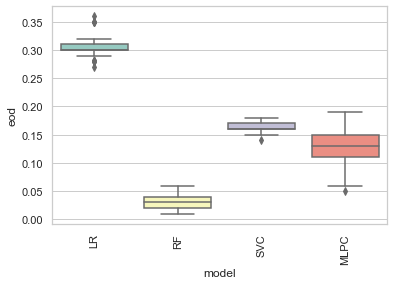

In [70]:
df = get_all_results(operators, 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="model", y="eod", data=df, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))



1. Analysing sex for SPD

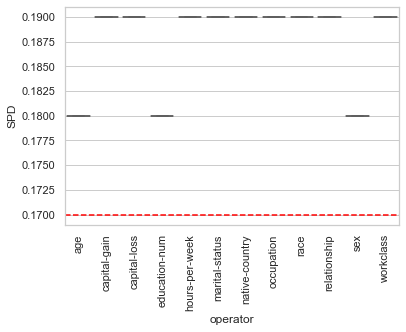

In [71]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="model", y="eod", hue="PA", data=first_df, palette="Set3")

df_lr = get_results_model(operators, 'LR', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_lr, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

ax.axhline(0.17, color='red', ls='--')


[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

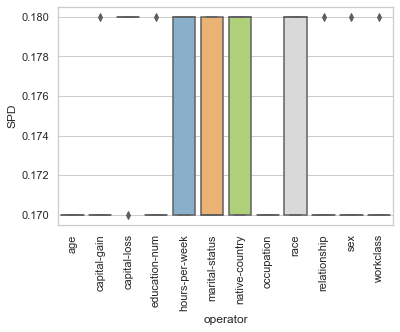

In [72]:
df_rf = get_results_model(operators, 'RF', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_rf, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))


[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

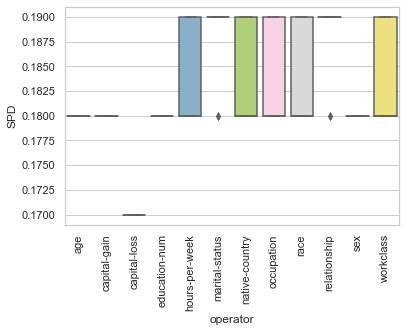

In [73]:
df_svc = get_results_model(operators, 'SVC', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_svc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

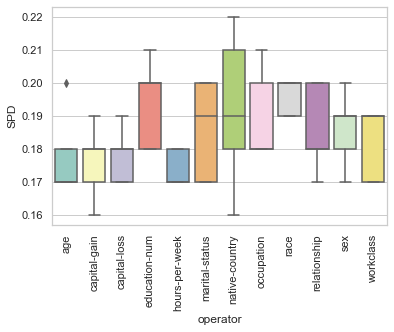

In [74]:
df_mlpc = get_results_model(operators, 'MLPC', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="SPD", data=df_mlpc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

2. Analysing sex for EOD

[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

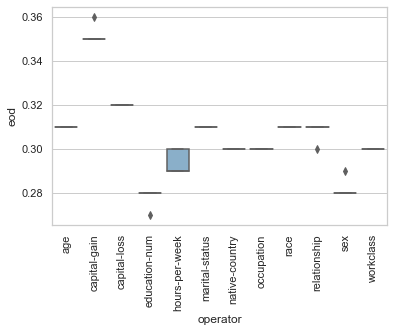

In [75]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")
# ax = sns.boxplot(x="model", y="eod", hue="PA", data=first_df, palette="Set3")

df_lr = get_results_model(operators, 'LR', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_lr, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

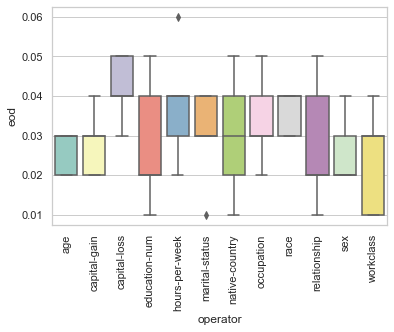

In [76]:
df_rf = get_results_model(operators, 'RF', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_rf, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

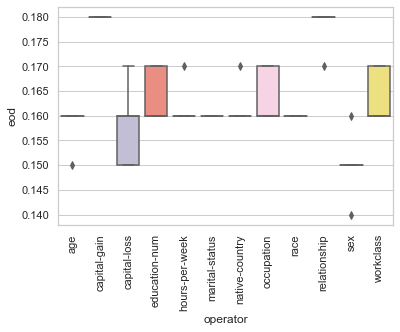

In [77]:
df_svc = get_results_model(operators, 'SVC', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_svc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))

[Text(0, 0, 'age'),
 Text(1, 0, 'capital-gain'),
 Text(2, 0, 'capital-loss'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'hours-per-week'),
 Text(5, 0, 'marital-status'),
 Text(6, 0, 'native-country'),
 Text(7, 0, 'occupation'),
 Text(8, 0, 'race'),
 Text(9, 0, 'relationship'),
 Text(10, 0, 'sex'),
 Text(11, 0, 'workclass')]

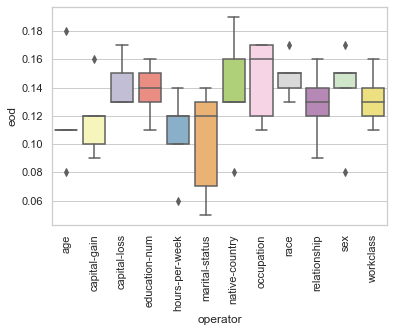

In [78]:
df_mlpc = get_results_model(operators, 'MLPC', 'sex')
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x="operator", y="eod", data=df_mlpc, palette="Set3")
ax.set_xticklabels(ax.get_xticklabels(),rotation = (90))